In [20]:
# -*- coding: utf-8 -*-
from pyhive import hive

HOST = "192.168.12.5"
PORT = 10000
NAME = "root"
PASSWORD = "5606603"
DATABASE="behavior_labels"
conn = hive.Connection(host=HOST, port=PORT, username=NAME, password=PASSWORD, auth="LDAP", database=DATABASE)

cursor = conn.cursor()
sql = "SELECT  score, center FROM dw_vip_results where subject = 1"
cursor.execute(sql)
data=[]
for result in cursor.fetchall():
    data.append(result)
    
    
import pandas as pd
data=pd.DataFrame(data)  
data.columns=["score", "center"]
data

,score,center
0,22.86,1
1,13.94,6
2,30.90,1
3,71.98,0
4,20.47,1
5,79.02,4
6,39.82,3
7,39.19,3
8,21.60,1
9,55.02,5


In [38]:
data.describe()

,score,center
count,2.191257e+06,2.191257e+06
mean,5.024157e+01,2.786368e+00
std,2.041600e+01,1.875030e+00
min,1.000000e+00,0.000000e+00
25%,3.555000e+01,1.000000e+00
50%,5.025000e+01,3.000000e+00
75%,6.495000e+01,5.000000e+00
max,1.000000e+02,6.000000e+00


In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(data[["score"]],data["center"])
clf.predict(data[["score"]])

array([1, 6, 1, ..., 2, 1, 0])

In [34]:
from sklearn.tree import export_graphviz
import pydotplus

with open("/home/messi/graphviz/Behavior1Tree.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("/home/messi/graphviz/Behavior1Tree.pdf")

True

In [35]:
# %matplotlib inline
# from IPython.display import Image
# Image("/home/messi/graphviz/Behavior1Tree.pdf")

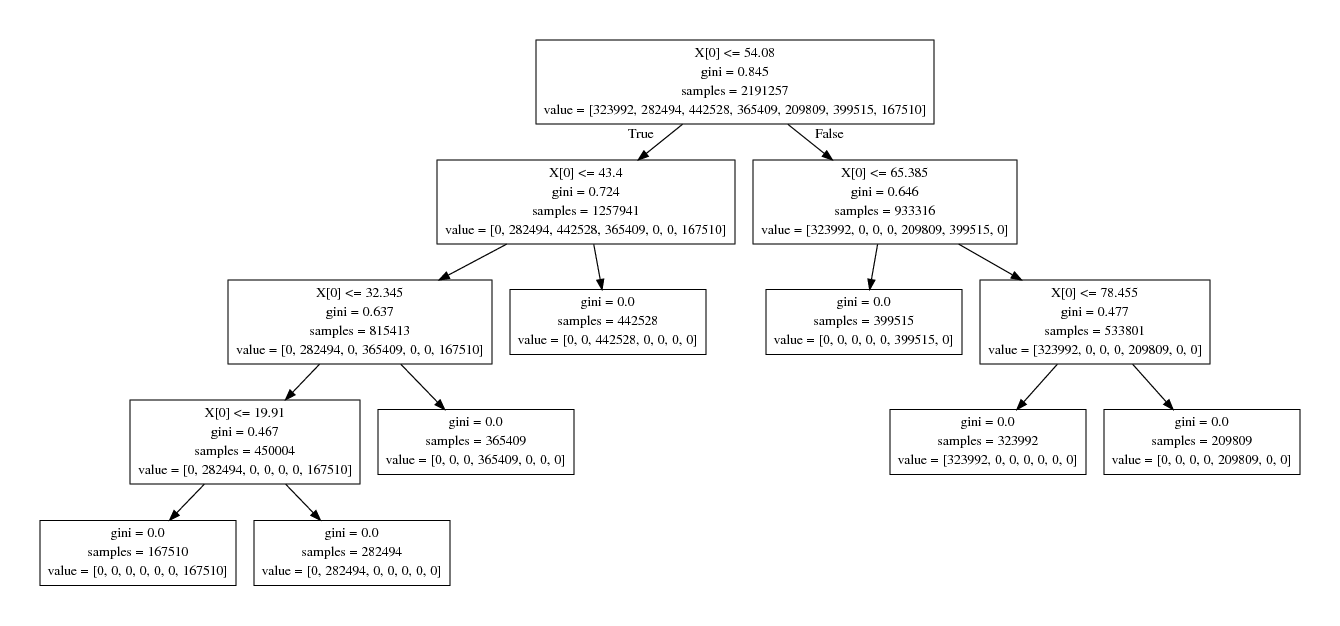

In [37]:
from wand.image import Image as WImage
img = WImage(filename="/home/messi/graphviz/Behavior1Tree.pdf")
img